<a href="https://colab.research.google.com/github/donaldocelaj/DS-Sprint-01-Dealing-With-Data/blob/master/Copy_of_LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
#!pip install seaborn --upgrade
#import os
#os.kill(os.getpid(), 9)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [4]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [5]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [6]:
print(table1)

print(table1.reset_index().melt(id_vars='index'))

              treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1
          index    variable  value
0    John Smith  treatmenta    NaN
1      Jane Doe  treatmenta   16.0
2  Mary Johnson  treatmenta    3.0
3    John Smith  treatmentb    2.0
4      Jane Doe  treatmentb   11.0
5  Mary Johnson  treatmentb    1.0


## Table 2 --> Tidy

In [8]:
# Assignment - Turn table 2 into tidy
tidy2 = table2.reset_index().melt(id_vars=('index'))
tidy2 = tidy2.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})
tidy2


,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

## Tidy --> Table 2

In [9]:
# Turn tidy into table 2

table2_again = tidy2.pivot_table(index='trt', columns='name', values='result')
table2_again

name,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


## Seaborn uses tidy data



> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

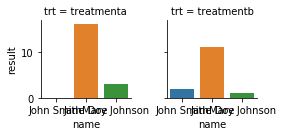

In [10]:
import seaborn as sns

sns.catplot(x='name', y='result', col='trt',
            kind='bar', data=tidy2, height=2)
           

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

Run these cells to load the data

In [0]:
%cd instacart_2017_05_01

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
flights = sns.load_dataset('flights')


In [14]:
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


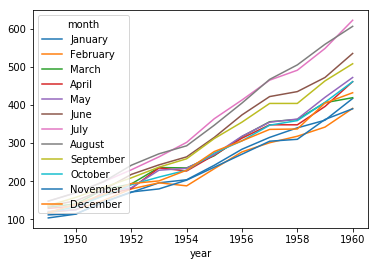

In [15]:
flights.pivot_table(index='year',
                    columns='month',
                    values='passengers').plot()
                    

In [18]:
import pandas as pd
flights_table = pd.crosstab(flights.year,
                            flights.passengers
                           )
flights_table

passengers,104,112,114,115,118,119,121,125,126,129,...,467,472,491,505,508,535,548,559,606,622
year,,,,,,,,,,,,,,,,,,,,,
1949,1,1,0,0,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1950,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1957,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


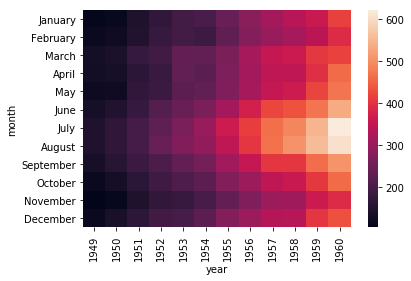

In [23]:
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)